In [1]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

In [2]:
df = pd.read_csv("carsdata.csv")
df.head(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Renaming column names

In [4]:
df = df.rename(columns={"Engine Fuel Type": "Fuel_Type",
                        "Engine HP": "HP", 
                        "Engine Cylinders": "Cylinders", 
                        "Transmission Type": "Transmission", 
                        "Driven_Wheels": "Drive_Mode",
                        "highway MPG": "MPG_H",
                        "city mpg": "MPG_C", 
                        "MSRP": "Price",
                       "Number of Doors": "Doors",
                       "Market Category":"Category",
                       "Vehicle Size":"Size",
                        "Vehicle Style":"Style"
                       })
df.head(5)

,Make,Model,Year,Fuel_Type,HP,Cylinders,Transmission,Drive_Mode,Doors,Category,Size,Style,MPG_H,MPG_C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Checking Total Records

In [5]:
df.shape

(11914, 16)

In [6]:
df.count() 

Make            11914
Model           11914
Year            11914
Fuel_Type       11911
HP              11845
Cylinders       11884
Transmission    11914
Drive_Mode      11914
Doors           11908
Category         8172
Size            11914
Style           11914
MPG_H           11914
MPG_C           11914
Popularity      11914
Price           11914
dtype: int64

# Checking Duplicates

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)


In [8]:
sum(df.duplicated())

715

In [9]:
df2 = df.drop_duplicates()
df2.head(5)

,Make,Model,Year,Fuel_Type,HP,Cylinders,Transmission,Drive_Mode,Doors,Category,Size,Style,MPG_H,MPG_C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df2.shape

(11199, 16)

# Handling Missing Values

In [11]:
df2.isnull().sum()

Make               0
Model              0
Year               0
Fuel_Type          3
HP                69
Cylinders         30
Transmission       0
Drive_Mode         0
Doors              6
Category        3376
Size               0
Style              0
MPG_H              0
MPG_C              0
Popularity         0
Price              0
dtype: int64

## Percentage of Missing Values

In [12]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,Category,30.15
1,HP,0.62
2,Cylinders,0.27
3,Doors,0.05
4,Fuel_Type,0.03
5,Make,0.00
6,Model,0.00
7,Year,0.00
8,Transmission,0.00
9,Drive_Mode,0.00


## Drop all the missing rows

In [13]:
df3 = df2.dropna()    # Dropping the missing values.
df3.count()

Make            7735
Model           7735
Year            7735
Fuel_Type       7735
HP              7735
Cylinders       7735
Transmission    7735
Drive_Mode      7735
Doors           7735
Category        7735
Size            7735
Style           7735
MPG_H           7735
MPG_C           7735
Popularity      7735
Price           7735
dtype: int64

## Impute or replace missing values

In [14]:
df4 = df2.copy()

In [15]:
### We will use Mode to fill up missing values in Categorical columns
df4['Category'].fillna(df['Category'].mode()[0], inplace = True)
df4['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0], inplace = True)
   

### We will use mean to fill up missing values in Numerical columns
df4['HP'].fillna(df4['HP'].mean(), inplace = True)

### We will use median to fill up missing values in Ordinal Numerical columns
df4['Cylinders'].fillna(df4['Cylinders'].median(), inplace = True)
df4['Doors'].fillna(df4['Doors'].median(), inplace = True)

In [16]:
df4.count()

Make            11199
Model           11199
Year            11199
Fuel_Type       11199
HP              11199
Cylinders       11199
Transmission    11199
Drive_Mode      11199
Doors           11199
Category        11199
Size            11199
Style           11199
MPG_H           11199
MPG_C           11199
Popularity      11199
Price           11199
dtype: int64

In [17]:
percent_missing = df4.isnull().sum() * 100 / len(df4)
missing_value_df = pd.DataFrame({'column_name': df4.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,Make,0.0
1,Model,0.0
2,Year,0.0
3,Fuel_Type,0.0
4,HP,0.0
5,Cylinders,0.0
6,Transmission,0.0
7,Drive_Mode,0.0
8,Doors,0.0
9,Category,0.0


# Exploratory Data Analysis

## Univariate

In [18]:
# Counts
df4.Make.value_counts()

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Genesis   

In [19]:
df4.Make.value_counts().nlargest(20)

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Name: Make, dtype: int64

In [20]:
a = df4['Make'].value_counts().nlargest(20)

In [21]:
a

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Name: Make, dtype: int64

<AxesSubplot:>

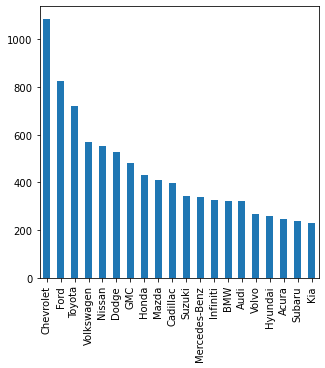

In [22]:
a.plot(kind='bar', figsize=(5,5))

<AxesSubplot:xlabel='Make', ylabel='count'>

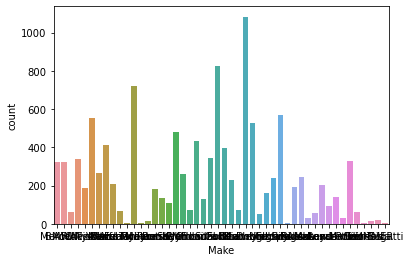

In [23]:
#sns library
sns.countplot(x ='Make', data = df4)

<AxesSubplot:xlabel='Make', ylabel='count'>

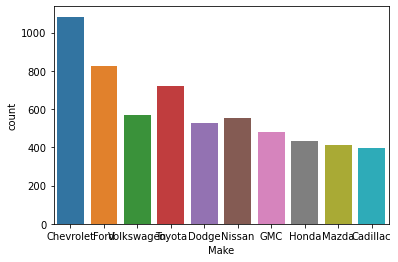

In [24]:
sns.countplot(x ='Make', data = df4, order=df['Make'].value_counts()[:10].index)

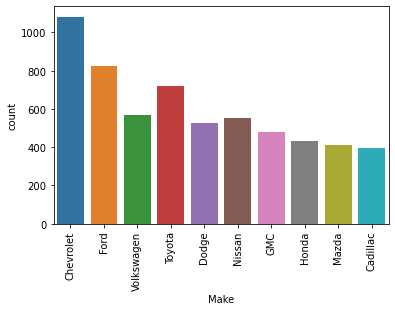

In [25]:
ax = sns.countplot(x ='Make', data = df4, order=df['Make'].value_counts()[:10].index)
ax.tick_params(axis='x', rotation=90)

In [ ]:
## Box plot

# Bivariate Analysis (using two variables)

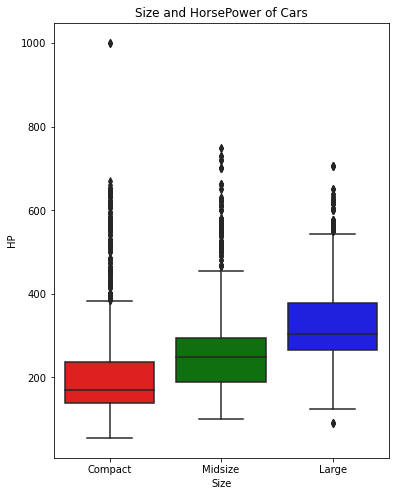

In [27]:
plt.figure(figsize=(6,8))
colors = ['red', 'green','blue']
sns.boxplot(data =df4, x='Size', y='HP',palette=colors)
plt.title('Size and HorsePower of Cars')
plt.show()

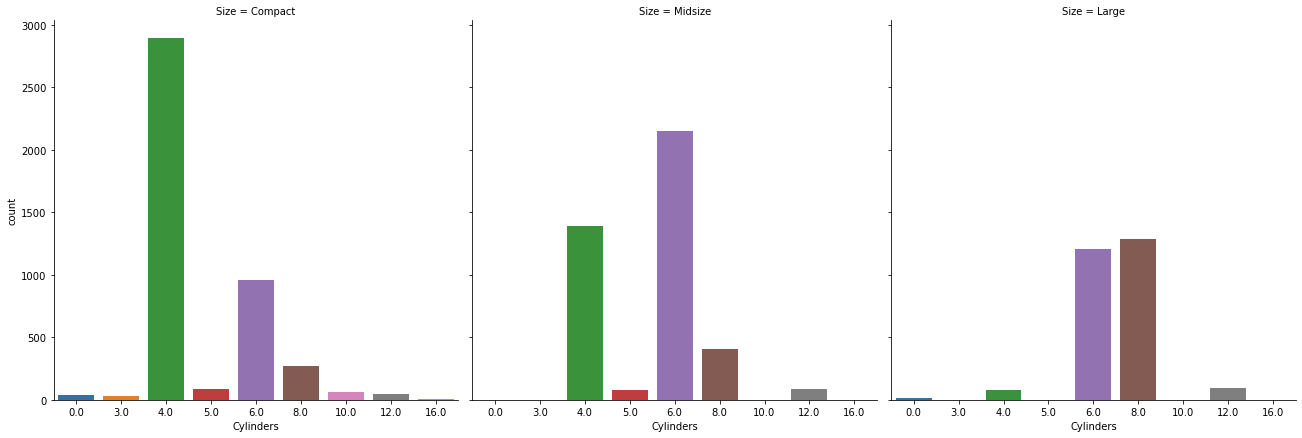

In [28]:
sns.catplot(x="Cylinders", col="Size",
                data=df4, kind="count",
                height=6, aspect=1);

## Scatter plot

<AxesSubplot:xlabel='MPG_H', ylabel='MPG_C'>

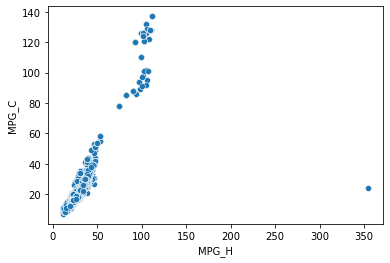

In [29]:
sns.scatterplot(data=df4, x="MPG_H", y="MPG_C")

# Multivariate

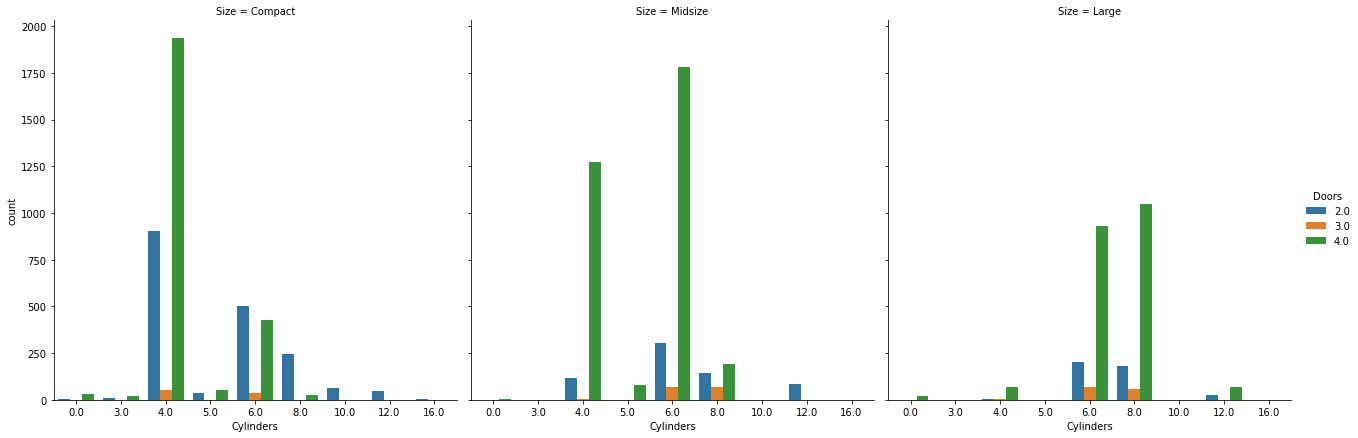

In [30]:
sns.catplot(x="Cylinders", hue="Doors", col="Size",
                data=df4, kind="count",
                height=6, aspect=1);

# Correlation Plot

In [31]:
df4

,Make,Model,Year,Fuel_Type,HP,Cylinders,Transmission,Drive_Mode,Doors,Category,Size,Style,MPG_H,MPG_C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<AxesSubplot:>

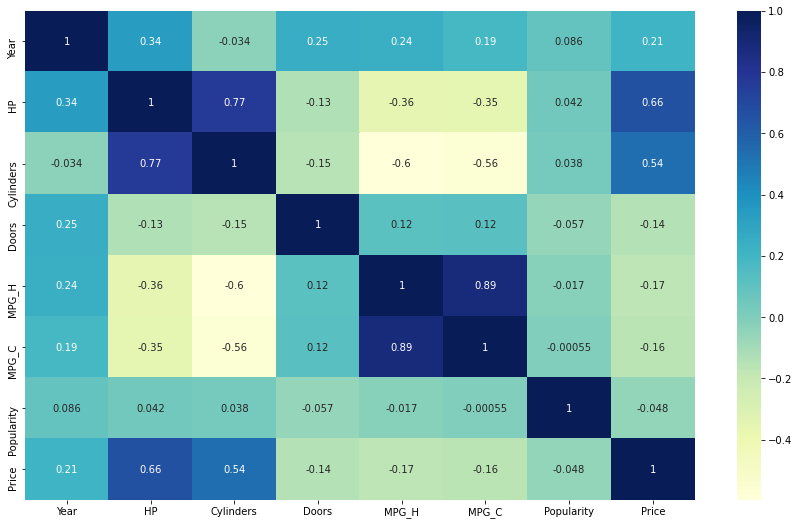

In [32]:
plt.figure(figsize = (15,9))
sns.heatmap(df4.corr(),cmap='YlGnBu',annot=True)

In [ ]:
# #For newer versions of Pandas Library
# plt.figure(figsize = (15,9))
# sns.heatmap(df4.corr(numeric_only=True),cmap='YlGnBu',annot=True)

<AxesSubplot:>

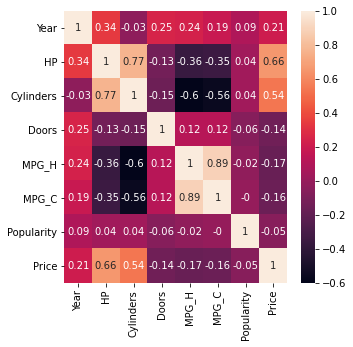

In [33]:
plt.figure(figsize = (5,5))
sns.heatmap(round(df4.corr(),2),annot=True)

# Grouping and Aggregation

In [34]:
df4.groupby(['Make','Year'])['Price'].mean()

Make   Year
Acura  1992     2000.000000
       1993     2017.000000
       1994     2120.333333
       1995     2245.333333
       1997     2442.500000
                   ...     
Volvo  2013    31516.666667
       2014    40283.333333
       2015    41437.288136
       2016    44877.537313
       2017    46145.652174
Name: Price, Length: 735, dtype: float64

In [35]:
df4.groupby(['Make','Year'])['Price'].mean().reset_index(name="Avg_Price")

,Make,Year,Avg_Price
0,Acura,1992,2000.000000
1,Acura,1993,2017.000000
2,Acura,1994,2120.333333
3,Acura,1995,2245.333333
4,Acura,1997,2442.500000
...,...,...,...
730,Volvo,2013,31516.666667
731,Volvo,2014,40283.333333
732,Volvo,2015,41437.288136
733,Volvo,2016,44877.537313


In [36]:
df4.groupby(['Make','Year'])['Price'].mean().nlargest(10).reset_index(name="Avg_Price")

,Make,Year,Avg_Price
0,Bugatti,2008,1782951.0
1,Bugatti,2009,1705769.0
2,Maybach,2012,616310.0
3,Maybach,2011,610200.0
4,Lamborghini,2008,585840.0
5,Lamborghini,2010,450000.0
6,Porsche,2004,440000.0
7,Porsche,2005,440000.0
8,Maybach,2010,434500.0
9,Lamborghini,2015,424560.0


In [37]:
df4.groupby(['Size','Style']).agg({'MPG_H': ['mean', 'min', 'max']})

MPG_H         
                                  mean min  max
Size    Style                                  
Compact 2dr Hatchback        31.483871  17  108
        2dr SUV              20.827586  14   30
        4dr Hatchback        39.194872  21  111
        4dr SUV              28.371212  19   35
        Cargo Minivan        26.275862  20   29
        Cargo Van            16.625000  15   20
        Convertible          26.121043  12   41
        Convertible SUV      23.920000  14   28
        Coupe                26.045942  12   41
        Crew Cab Pickup      21.610656  16   27
        Extended Cab Pickup  21.453237  16   27
        Passenger Minivan    24.164706  19   28
        Passenger Van        15.400000  15   17
        Regular Cab Pickup   22.653846  16   27
        Sedan                32.253782  20   47
        Wagon                31.651163  22   92
Large   4dr Hatchback        25.800000  24   28
        4dr SUV              21.530938  15   29
        Cargo Minivan        20.000000  18   24
        Cargo Van            16.312500  13   18
        Convertible          17.928571  15   25
        Coupe                21.666667  14   30
        Crew Cab Pickup      20.827251  15   26
        Extended Cab Pickup  19.156740  13   26
        Passenger Minivan    23.357798  15   28
        Passenger Van        18.166667  16   19
        Regular Cab Pickup   20.078838  13   25
        Sedan                26.688131  14  107
        Wagon                22.755102  18   26
Midsize 2dr Hatchback        24.777778  23   29
        2dr SUV              17.242424  12   20
        4dr Hatchback        27.676471  22   34
        4dr SUV              24.133808  13   74
        Cargo Minivan        22.400000  21   24
        Cargo Van            16.704545  13   20
        Convertible          24.226316  16   34
        Convertible SUV      22.000000  22   22
        Coupe                25.997602  15   35
        Passenger Minivan    23.466667  21   28
        Passenger Van        16.962500  14   19
        Sedan                31.226648  16  354
        Wagon                27.019417  18   43

In [38]:
b = df4.groupby(['Make','Year'])['Price'].mean().nlargest(10).reset_index(name="Avg_Price")
b

,Make,Year,Avg_Price
0,Bugatti,2008,1782951.0
1,Bugatti,2009,1705769.0
2,Maybach,2012,616310.0
3,Maybach,2011,610200.0
4,Lamborghini,2008,585840.0
5,Lamborghini,2010,450000.0
6,Porsche,2004,440000.0
7,Porsche,2005,440000.0
8,Maybach,2010,434500.0
9,Lamborghini,2015,424560.0


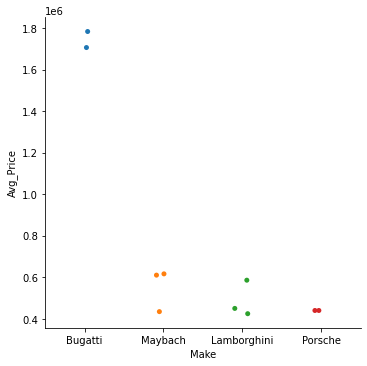

In [39]:
sns.catplot(x="Make", y="Avg_Price", kind="strip", data=b)

# Dropping Columns

In [40]:
df5 = df.drop(['Fuel_Type', 'Category', 'Style', 'Popularity', 'Doors', 'Size'], axis=1)
df5.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
